In [1]:
MODEL = 'nli_clinical_bert'
# DATASET = 'control_test'
DATASET = 'exame_OSCE_cefaleia'
DATASET = 'exame_OSCE'

# TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
IMG_PATH = 'img/' + DATASET + '_' + MODEL + '/'

import os.path

if not os.path.exists(TSV_PATH):
    os.mkdir(TSV_PATH)
    
if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
import pandas as pd

embeddings_df = pd.read_csv(TSV_PATH + 'word_embeddings.tsv', sep='\t',header=None)
# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/stsb-roberta-large/exame-OSCE/cefaleia/word_embeddings.tsv', sep='\t',header=None)

sentences_df = pd.read_csv(TSV_PATH + 'labels.tsv', sep='\t',header=None)
# sentences_df = pd.read_csv('../sentence_embedding/tsv_files/paraphrase-distilroberta-base-v1/exame-OSCE/cefaleia/labels.tsv', sep='\t',header=None)

print(sentences_df)
embeddings_numpy = embeddings_df.to_numpy()
sentences_numpy = sentences_df.to_numpy()

X_embeddings = embeddings_numpy[:, :-1]

provas = []
for i in range(len(X_embeddings)):
    provas.append(i)
embeddings_df

                                                     0
0    location, onset, characteristics, radiation, a...
1    is a type of primary headache, more prevalent ...
2    When investigating a headache, the onset, freq...
3    Migraines are often hemicranial pains under pr...
4    locate pain (laterality, region); assessment o...
..                                                 ...
221  Severe unilateral pain, more localized in a re...
222  Characterize the pain in terms of location, in...
223  Pressure pain, which can last from several min...
224  Clinical history: onset of symptoms / characte...
225  Migraines are pictures of headache of benign c...

[226 rows x 1 columns]


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,0.447343,-0.343146,0.218411,1.147695,-0.145658,-0.131758,0.027484,0.072224,0.346059,-0.631714,...,1.134069,-0.353833,-0.149659,0.197085,0.160925,0.006032,-0.057427,-0.727802,-0.348505,NaN
1,0.340903,-0.123002,0.586287,0.704424,0.096872,0.961421,0.963606,0.575068,0.658453,-0.104103,...,0.457742,1.296107,-0.986975,0.370269,0.678777,0.433922,-0.059715,-0.157533,-0.653409,NaN
2,0.378171,-0.790414,0.458711,0.297382,0.422155,-0.668680,1.006022,-0.096534,0.577392,-0.277640,...,0.357554,1.151550,-0.273822,0.005145,-0.298826,0.017354,-0.743434,-0.445170,-0.622237,NaN
3,-0.089451,0.963667,0.276672,0.143616,-0.517258,0.553877,0.339075,0.332353,0.942590,-0.379676,...,0.408383,0.419142,-0.434424,0.931328,0.552838,0.219413,0.392251,0.019139,-0.375382,NaN
4,0.579448,-0.333298,-0.042743,0.795108,-0.302029,-0.257801,-0.305139,-0.119832,0.152242,-0.188193,...,0.337529,-0.288469,0.009001,0.073839,0.144560,0.527198,0.267433,-0.733828,-0.574577,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.348555,0.018926,1.260318,-0.158893,-0.126641,0.205401,-0.172865,0.518343,0.709649,0.357194,...,0.221864,0.651752,-1.327347,0.181422,0.275746,-0.017436,-0.279298,-0.048541,-0.766373,NaN
222,0.268505,0.070492,0.453567,0.070426,-0.597197,0.586869,0.582872,-0.034143,0.090448,0.371379,...,1.057664,0.691780,-0.217061,-0.175912,0.253346,0.615165,1.004366,-0.623879,-0.094788,NaN
223,-0.432346,-0.429263,0.029762,0.945224,-0.617170,-0.254974,0.689442,0.367121,0.590786,0.123478,...,1.334051,0.921288,-0.066304,-0.324916,-0.246725,0.396264,0.413723,0.474393,0.007173,NaN
224,0.273110,-0.438382,0.185034,0.306032,0.162412,-0.325648,-0.213027,0.888218,0.104068,-0.838646,...,0.762911,0.197203,-0.399756,-0.202059,0.098506,0.532381,0.210858,0.183302,-0.358412,NaN


In [3]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(provas[i])+'.', color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold'})
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.nipy_spectral(labels[i] / 10.), s=40, cmap='hsv_r')

# Define os valores nos eixos
    plt.xticks([0,1.1])
    plt.yticks([0,1.1])
    plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig(title)

In [4]:
def plot_clustering_v2(X, labels, title=None):
    X_2d
    clustered_x = []
    clustered_y = []
    for x in X:
        clustered_x.append(x[0])
        clustered_y.append(x[1])
    
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(clustered_x)):
        plt.text(clustered_x[i], clustered_y[i], provas[i], color=plt.cm.nipy_spectral(labels[i] / 10.),
                         fontdict={'weight': 'bold'})

    plt.scatter(clustered_x, clustered_y, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')
    plt.xticks([])
    plt.yticks([])

    plt.colorbar()

In [5]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

s
7
13
18
22
28
37
43


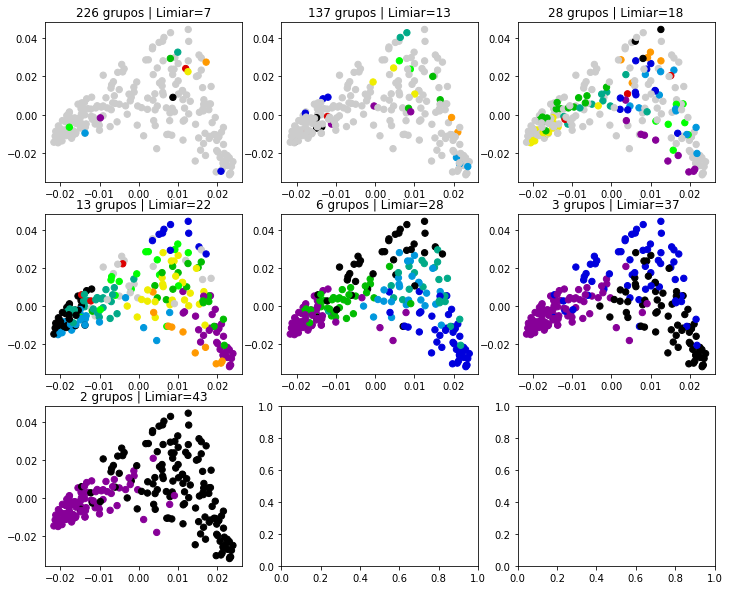

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold

from matplotlib import pyplot as plt 

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(X_embeddings)

x = X_2d[:,0]
y = X_2d[:,1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

set_of_colors = []
n_clusters = []
distance_thresholds = []
models = []
print('s')
distance_thresholds = [7, 13, 18, 22, 28, 37, 43]
# distance_thresholds = [1, 5, 7, 9, 10, 12, 15, ]

for i in distance_thresholds:
    print(i)
#     distance_thresholds.append(11+i)
    agglomerative = AgglomerativeClustering(linkage='ward', distance_threshold=i, n_clusters=None)

    agglomerative = agglomerative.fit(X_embeddings)
    
    models.append(agglomerative)
    
    n_clusters.append(agglomerative.n_clusters_)
    colors = []
    for l in agglomerative.labels_:
        colors.append(plt.cm.nipy_spectral(l / 10.))
    set_of_colors.append(colors)
    
ax[0][0].scatter(x, y, color=set_of_colors[0], s=40, cmap='hsv_r')
ax[0][0].title.set_text(str(n_clusters[0]) + ' grupos | Limiar=' + str(distance_thresholds[0]))

ax[0][1].scatter(x, y, color=set_of_colors[1], s=40, cmap='hsv_r')
ax[0][1].title.set_text(str(n_clusters[1]) + ' grupos | Limiar=' + str(distance_thresholds[1]))

ax[0][2].scatter(x, y, color=set_of_colors[2], s=40, cmap='hsv_r')
ax[0][2].title.set_text(str(n_clusters[2]) + ' grupos | Limiar=' + str(distance_thresholds[2]))

ax[1][0].scatter(x, y, color=set_of_colors[3], s=40, cmap='hsv_r')
ax[1][0].title.set_text(str(n_clusters[3]) + ' grupos | Limiar=' + str(distance_thresholds[3]))

ax[1][1].scatter(x, y, color=set_of_colors[4], s=40, cmap='hsv_r')
ax[1][1].title.set_text(str(n_clusters[4]) + ' grupos | Limiar=' + str(distance_thresholds[4]))

ax[1][2].scatter(x, y, color=set_of_colors[5], s=40, cmap='hsv_r')
ax[1][2].title.set_text(str(n_clusters[5]) + ' grupos | Limiar=' + str(distance_thresholds[5]))

ax[2][0].scatter(x, y, color=set_of_colors[6], s=40, cmap='hsv_r')
ax[2][0].title.set_text(str(n_clusters[6]) + ' grupos | Limiar=' + str(distance_thresholds[6]))

plt.savefig(IMG_PATH + 'clusters.eps')
plt.show()

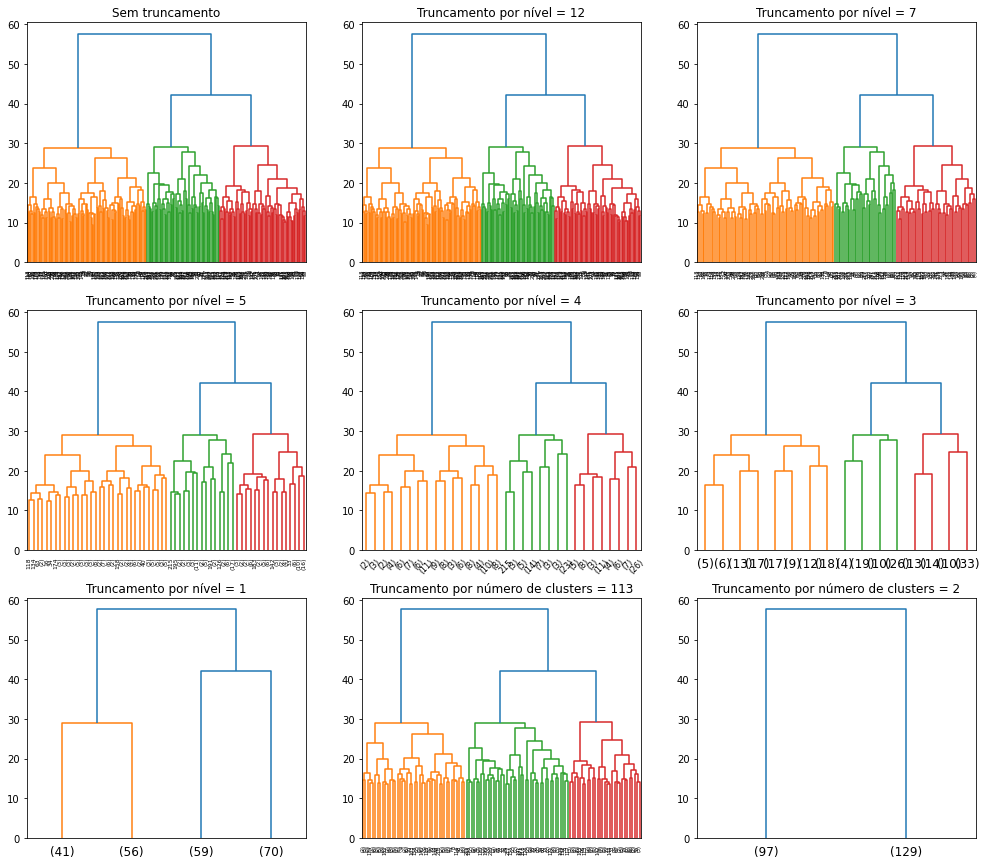

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(17, 15))

# Sem aplicar truncamento no dendograma
ax[0][0].title.set_text('Sem truncamento')
plot_dendrogram(models[0], truncate_mode=None, ax=ax[0][0])

# Truncando por nível
# Não mais do que p níveis da árvore do dendrograma são exibidos. Um “nível” inclui todos os nós com mesclagens p da última mesclagem. 
ax[0][1].title.set_text('Truncamento por nível = '+ str(12))
plot_dendrogram(models[1], truncate_mode='level', p=12, ax=ax[0][1])

ax[0][2].title.set_text('Truncamento por nível = '+ str(7))
plot_dendrogram(models[2], truncate_mode='level', p=7, ax=ax[0][2])

ax[1][0].title.set_text('Truncamento por nível = '+ str(5))
plot_dendrogram(models[3], truncate_mode='level', p=5, ax=ax[1][0])
ax[1][1].title.set_text('Truncamento por nível = '+ str(4))
plot_dendrogram(models[4], truncate_mode='level', p=4, ax=ax[1][1])
ax[1][2].title.set_text('Truncamento por nível = '+ str(3))
plot_dendrogram(models[5], truncate_mode='level', p=3, ax=ax[1][2])
ax[2][0].title.set_text('Truncamento por nível = '+ str(1))
plot_dendrogram(models[6], truncate_mode='level', p=1, ax=ax[2][0])


# Os últimos p clusters não únicos, formados na rede são os únicos nós não folha na rede; eles correspondem às linhas Z [n-p-2: fim] em Z. Todos os outros clusters não singleton são contraídos em nós folha. 
ax[2][1].title.set_text('Truncamento por número de clusters = '+ str(113))
plot_dendrogram(models[6], truncate_mode='lastp', p=113, ax=ax[2][1])
ax[2][2].title.set_text('Truncamento por número de clusters = '+ str(2))
plot_dendrogram(models[6], truncate_mode='lastp', p=2, ax=ax[2][2])

plt.savefig(IMG_PATH + 'dendogramas.eps')
# plot_dendrogram(models[2], truncate_mode='lastp', p=6, ax=ax[0][2])


In [9]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
Note: you may need to restart the kernel to use updated packages.


[226, 137, 28, 13, 6, 3, 2]

AgglomerativeClustering(distance_threshold=7, n_clusters=None)
n clusters:  226
Cluster:  0
Topics (ascending order):
interfere
affect
despite
iburpophen
sex
feminine
age
benign
including
general

Cluster:  1
Topics (ascending order):
food
exposure
pain
risk
hormonal
correlation
unique
quantity
legitimate
history

Cluster:  2
Topics (ascending order):
women
age
hx
menstruation
pressure
minutes
childbearing
periodic
coinciding
groundings

Cluster:  3
Topics (ascending order):
triggering
require
hemorrhage
intracranial
hypertension
subarachnoid
factors
sensation
intervention
urgent

Cluster:  4
Topics (ascending order):
meningeal
olfactory
localized
visual
scotomas
12
pictures
irritation
resulting
jet

Cluster:  5
Topics (ascending order):
exploring
explore
explain
exists
existence
exhaustive
explored
zones
headache
aur

Cluster:  6
Topics (ascending order):
potentially
threatening
neoplastic
initial
meningoencephalitis
researching
undergo
mnemonic
sah
extens


Cluster:  66
Topics (ascending order):
tension
signals
characterization
understand
cluster
discard
differentiate
primary
secondary
important

Cluster:  67
Topics (ascending order):
vomiting
nausea
photophobia
visual
cause
days
limited
self
disturbances
ideally

Cluster:  68
Topics (ascending order):
explored
explore
explain
exists
existence
exhaustive
exercise
excluding
zones
limiting

Cluster:  69
Topics (ascending order):
strength
hx
sensitivity
different
increased
products
changes
sides
associate
tingling

Cluster:  70
Topics (ascending order):
period
photopsia
alteration
ttx
healthy
tendon
intercrisals
exacerbating
brightness
conservative

Cluster:  71
Topics (ascending order):
history
current
attention
second
illness
special
steps
suspect
exam
step

Cluster:  72
Topics (ascending order):
days
rest
head
region
migraines
silence
scintillating
recurrent
scotoma
attacks

Cluster:  73
Topics (ascending order):
ec
parameters
evaluate
sedimentation
occupying
lesion
space
arthritis
prese


Cluster:  131
Topics (ascending order):
associated
aura
unilateral
days
nsaids
treated
generally
recurrence
ptofilacia
disappears

Cluster:  132
Topics (ascending order):
infectious
summarize
intake
procedure
contacts
altered
conclude
post
lifestyles
portural

Cluster:  133
Topics (ascending order):
intermittent
anamnesis
constant
history
recurrence
factors
radiation
chronic
illnesses
begins

Cluster:  134
Topics (ascending order):
non
triptans
anti
month
indicated
prevention
emetics
severe
nsaids
cases

Cluster:  135
Topics (ascending order):
nausea
fever
characterize
neurological
onset
severe
sudden
red
flags
vertigo

Cluster:  136
Topics (ascending order):
duration
aggravation
personal
auditory
previous
consider
particular
evolation
adl
influenced

Cluster:  137
Topics (ascending order):
characterization
warning
search
factors
cardiovascular
intensity
constitutional
decubitus
endocrine
symptoms

Cluster:  138
Topics (ascending order):
dark
typically
evolution
relieves
moderate
para


Cluster:  197
Topics (ascending order):
headache
associated
unilateral
vomiting
photophobia
usually
phonophobia
products
naseas
anticipatory

Cluster:  198
Topics (ascending order):
example
headache
vomiting
nausea
photophobia
clinical
diagnosis
phonophobia
characterized
accompanied

Cluster:  199
Topics (ascending order):
daily
bilateral
occurs
variable
high
activities
month
living
episodic
anxiety

Cluster:  200
Topics (ascending order):
irradiation
tension
worsening
pain
make
neoplasia
saved
diagnosis
characteristics
differential

Cluster:  201
Topics (ascending order):
days
stress
lasts
coffee
triggers
various
aines
aurea
alcohol
relieves

Cluster:  202
Topics (ascending order):
situations
distinguish
allows
threatening
vs
deconstruction
recording
forms
perceive
symptom

Cluster:  203
Topics (ascending order):
headache
associated
unilateral
photophobia
visual
phonophobia
prodromes
hearing
changes
paresthesias

Cluster:  204
Topics (ascending order):
start
red
night
flags
years
50



Cluster:  36
Topics (ascending order):
presence
stress
day
lasting
triggers
prodromos
anxiety
normally
fot
fotopsia

Cluster:  37
Topics (ascending order):
headaches
ask
temporal
tumor
try
arteritis
sinusitis
investigate
bleeding
rule

Cluster:  38
Topics (ascending order):
high
minutes
month
unilateral
photophobia
takes
periodic
preferential
alternate
phonobobia

Cluster:  39
Topics (ascending order):
occurs
unilateral
hours
patients
headache
migraine
usually
phonophobia
aura
women

Cluster:  40
Topics (ascending order):
complaints
illness
steps
special
assessing
history
headache
exam
suspect
step

Cluster:  41
Topics (ascending order):
characteristics
physical
personal
medication
neurological
examination
aggravating
description
usual
relieving

Cluster:  42
Topics (ascending order):
relief
dizziness
possible
factors
aggravation
know
irradiation
pain
understand
important

Cluster:  43
Topics (ascending order):
medicate
accordingly
rhinitis
imbalances
screening
worrying
primary
tests



Cluster:  103
Topics (ascending order):
hemorrhages
mcdt
rhinosinusitis
varies
neoplasms
approaches
evaluation
focus
culture
depending

Cluster:  104
Topics (ascending order):
generally
occur
corresponds
usually
movement
episode
subjective
sensation
simultaneously
recurring

Cluster:  105
Topics (ascending order):
extensive
eye
eyes
history
diagnostic
physical
tests
examination
medical
auxiliary

Cluster:  106
Topics (ascending order):
childbearing
classic
form
aggravate
described
disappear
prevent
nagging
completely
women

Cluster:  107
Topics (ascending order):
generally
region
does
painkillers
usual
yield
tingling
paracertamol
shining
sounds

Cluster:  108
Topics (ascending order):
know
mcdts
likelihood
background
context
carried
valuing
epidemiological
thoroughly
personal

Cluster:  109
Topics (ascending order):
benign
72
menstruation
general
related
tends
relatively
population
members
happen

Cluster:  110
Topics (ascending order):
pain
medical
relevant
radiates
constant
notice
r


Cluster:  3
Topics (ascending order):
aggravation
important
history
location
duration
characteristics
irradiation
intensity
relief
factors

Cluster:  4
Topics (ascending order):
location
factors
meningitis
secondary
alarm
worsening
duration
important
signs
headache

Cluster:  5
Topics (ascending order):
family
unilateral
phonophobia
accompanied
usually
rest
migraine
aura
benign
headache

Cluster:  6
Topics (ascending order):
localized
hours
nausea
dysfunction
clinical
changes
disabling
nsaids
vomiting
aura

Cluster:  7
Topics (ascending order):
migraine
prodromes
vomiting
nausea
photophobia
changes
aura
phonophobia
unilateral
headache

Cluster:  8
Topics (ascending order):
visual
episodes
self
woman
aura
menstruation
days
photophobia
limited
women

Cluster:  9
Topics (ascending order):
segmental
global
proceed
testing
propriocection
cerebellar
allergic
tests
important
cat

Cluster:  10
Topics (ascending order):
check
wake
persistent
lying
alame
long
intermittent
signs
night
headache



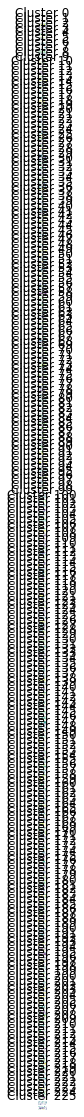

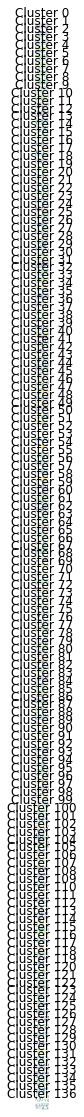

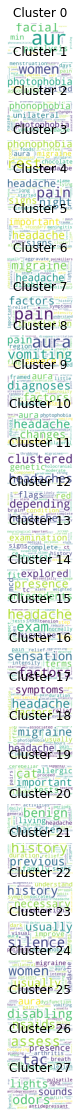

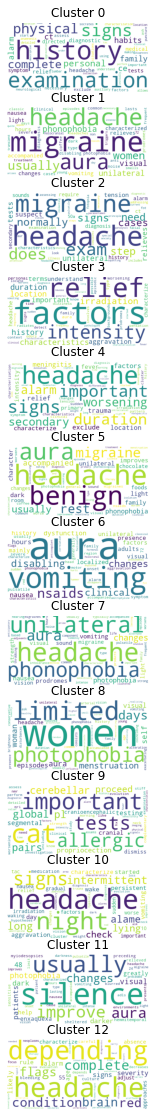

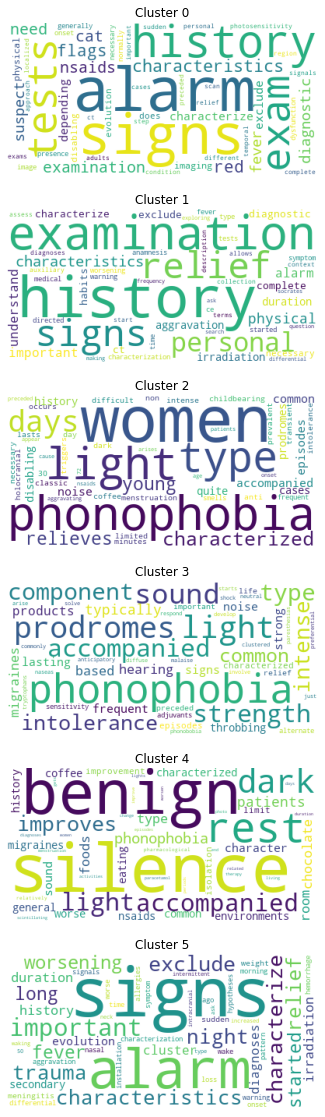

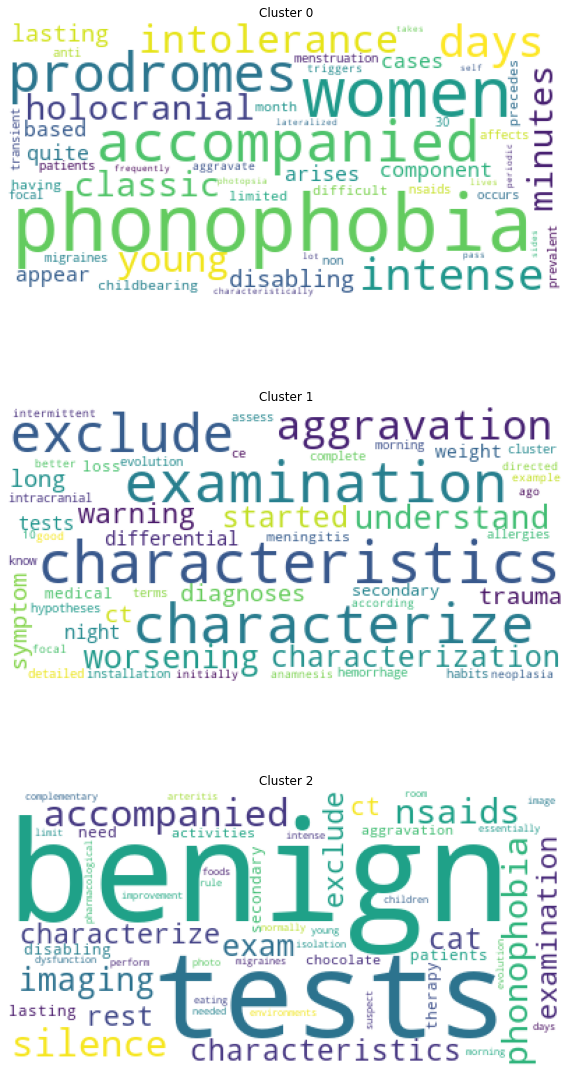

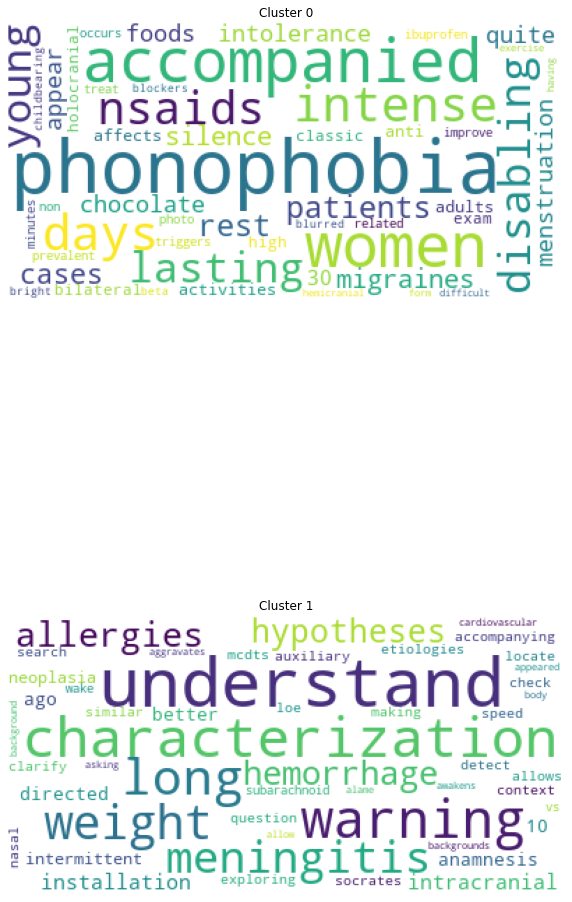

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 

# tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

print(n_clusters)
print()

k = 0
for n in n_clusters:
    print(models[k])
    print('n clusters: ',n)

    clusters_of_sentences = [''] * n

    for i in range(len(models[k].labels_)):
        sentence = ''
        sentence = sentences_numpy[i] + ' | '
        clusters_of_sentences[models[k].labels_[i]] += sentence
    
    clusters_of_sentences_formato_tfidf = []
    for d_c in clusters_of_sentences:
        clusters_of_sentences_formato_tfidf.append(str(d_c).split('[')[1].replace('[', '').replace(']\n', '').replace('\'', ''))

    tfidf = tf_idf_vectorizer.fit_transform(clusters_of_sentences_formato_tfidf)
    feature_names = tf_idf_vectorizer.get_feature_names()

    tfidf_matrix = tfidf.toarray()

    i=0
    topics_by_cluster = []
    wordclouds = []
    for d_c in clusters_of_sentences_formato_tfidf:
#         print(d_c)
        print('Cluster: ', i)

        sorted_index_array = np.argsort(tfidf_matrix[i]) 
        highests = sorted_index_array[-10:]

        topics = []
        print('Topics (ascending order):')
        for s in highests:
            print(feature_names[s])
            topics.append(feature_names[s])

        topics_by_cluster.append(topics)

        dense = tfidf[i].todense()
        lst1 = dense.tolist()
        df = pd.DataFrame(lst1, columns=feature_names)

        wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
        wordclouds.append(wordcloud)

        print()
        i+=1
    fig, axs = plt.subplots(n, figsize=(10, 20))
        
    j=0

    for wc in wordclouds:
        axs[j].title.set_text('Cluster '+str(j))
        axs[j].imshow(wc)
        axs[j].axis("off")
        j+=1
        
#     print(topics_by_cluster)

    k+=1
    plt.savefig(IMG_PATH + 'topicos_por_'+str(n)+'_clusters.eps')